In [2]:

# simple rag locally

In [3]:
# document/text processing and embedding creation 
# import pdf doc

In [4]:
# process text for embedding, split into chunks of sentences.
# embed text chunks with embedding model 
# save embeddings to file for later (embeddings will store on file for many years or until you lose your hard drive)

import os 
import requests 

In [5]:
# get pdf doc path 
pdf_path = "maiti2020.pdf"

# download pdf
if not os.path.exists(pdf_path):
    print("[INFO] File doesn't exist, downloading...")

    # enter the url of the pdf 
    url = "https://sci-hub.se/https://ieeexplore.ieee.org/document/9293712"

    # the local filename to save the downloaded file
    filename = pdf_path

    # send a GET request to the URL
    response = requests.get(url)

    # check if the request was successful
    if response.status_code == 200:
        # opem the file and save it 
        with open(filename, "wb") as file:
            file.write(response.content)
        print(f"[INFO] The file has been downloaded and saved as {filename}")
    else:
        print(f"[INFO] Failed to download the file. Status code: {response.status_code}")

else:
    print(f"File {pdf_path} exists.") 


File maiti2020.pdf exists.


In [6]:
%pip install PyMuPDF

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import fitz
from tqdm.auto import tqdm

In [9]:
def text_formatter(text: str) -> str:
    # performs minor formatting on the text in doc.
    cleaned_text = text.replace("\n", " ").strip()
    #potentially more text formatting functions can go here
    return cleaned_text

def open_and_read_pdf(pdf_path: str) -> list[dict]:
    doc = fitz.open(pdf_path)
    pages_and_texts = []
    for page_number, page in tqdm(enumerate(doc)):
        text = page.get_text()
        text = text_formatter(text=text)
        pages_and_texts.append({"page_number": page_number - 0,
                                "page_char_count": len(text),
                                "page_word_count": len(text.split(" ")),
                                "page_sentence_count_raw": len(text.split(". ")),
                                "page_token_count": len(text) / 4, # 1 token = ~ 4 characters
                                "text": text
                                })
    return pages_and_texts

pages_and_texts = open_and_read_pdf(pdf_path=pdf_path)
pages_and_texts[:2]

0it [00:00, ?it/s]

[{'page_number': 0,
  'page_char_count': 5703,
  'page_word_count': 876,
  'page_sentence_count_raw': 35,
  'page_token_count': 1425.75,
  'text': 'Indian Stock Market Prediction using Deep Learning Ayan Maiti Department of Mathematical and Computational Sciences National Institute of Technology Karnataka Surathkal, India ayan.182ma008@nitk.edu.in Pushparaj Shetty D Department of Mathematical and Computational Sciences National Institute of Technology Karnataka Surathkal, India prajshetty@nitk.edu.in Abstract—In this paper, we predict the stock prices of ﬁve companies listed on India’s National Stock Exchange (NSE) using two models- the Long Short Term Memory (LSTM) model and the Generative Adversarial Network (GAN) model with LSTM as the generator and a simple dense neural network as the discriminant. Both models take the online published historical stock-price data as input and produce the prediction of the closing price for the next trading day. To emulate the thought process of a r

In [10]:
import random
random.sample(pages_and_texts, k=3)

[{'page_number': 0,
  'page_char_count': 5703,
  'page_word_count': 876,
  'page_sentence_count_raw': 35,
  'page_token_count': 1425.75,
  'text': 'Indian Stock Market Prediction using Deep Learning Ayan Maiti Department of Mathematical and Computational Sciences National Institute of Technology Karnataka Surathkal, India ayan.182ma008@nitk.edu.in Pushparaj Shetty D Department of Mathematical and Computational Sciences National Institute of Technology Karnataka Surathkal, India prajshetty@nitk.edu.in Abstract—In this paper, we predict the stock prices of ﬁve companies listed on India’s National Stock Exchange (NSE) using two models- the Long Short Term Memory (LSTM) model and the Generative Adversarial Network (GAN) model with LSTM as the generator and a simple dense neural network as the discriminant. Both models take the online published historical stock-price data as input and produce the prediction of the closing price for the next trading day. To emulate the thought process of a r

In [11]:
import pandas as pd 

df = pd.DataFrame(pages_and_texts)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,0,5703,876,35,1425.75,Indian Stock Market Prediction using Deep Lear...
1,1,5203,882,48,1300.75,LSTM and GAN models to predict the stock price...
2,2,4107,738,39,1026.75,Fig. 1. A Generative Adversarial Network ’Clos...
3,3,4327,836,40,1081.75,TABLE II HYPER-PARAMETER VALUES FOR LSTM MODEL...
4,4,1779,282,15,444.75,TABLE III HYPER-PARAMETER VALUES FOR GENERATOR...


In [12]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,6.00,6.00,6.00,6.00,6.00
mean,2.50,3987.17,676.67,41.17,996.79
std,1.87,1471.60,252.99,17.93,367.90
min,0.00,1779.00,282.00,15.00,444.75
25%,1.25,3129.75,519.00,36.00,782.44
50%,2.50,4217.00,787.00,39.50,1054.25
75%,3.75,4984.00,866.00,46.00,1246.00
max,5.00,5703.00,882.00,70.00,1425.75


In [13]:
# why would we care about token count?
# token count is important because:
# 1. embedding models don't deal with infinte tokens
# 2. llms don't deal with infinite tokens.

In [14]:
# further text processing (splitting pages into sentences.)
# two ways to do this
# 1. we've done this with splitting on ". ".
# 2. we can do this with a nlp library such as spaCy and nltk

In [15]:
from spacy.lang.en import English 
nlp = English()

# add a sentencizer pipeline
nlp.add_pipe("sentencizer")

# create document instance as an example 
doc = nlp("This is a sentecnce. This is another sentence. I like elephants.")
assert len(list(doc.sents)) == 3

# print out our sentences split 
list(doc.sents)

[This is a sentecnce., This is another sentence., I like elephants.]

In [16]:
pages_and_texts[5]

{'page_number': 5,
 'page_char_count': 2804,
 'page_word_count': 446,
 'page_sentence_count_raw': 70,
 'page_token_count': 701.0,
 'text': 'V. CONCLUSION The results of the model update cycles on the predictive performance show that M=1200 and N=300 produce the best results of RMSRE=0.073884, obtained at look-back of 90 days. In other words, the predicted price had an average error difference of 7.3884% with respect to the actual price. However, the corresponding DPA was mere 0.505893, implying the model is not able to predict the direction of the price movement. We also found that increase in the number of look-back days did not have signiﬁcant improvement of results on LSTM model. As we suspect that the models have not achieved optimum training, we present some ideas below to reﬁne and continue our work forward: 1) The GAN model can be experimented on higher num- ber of look-back days and experiment by changing the hyper-parameters to improve the performance. 2) Experiment by incorpo

In [17]:
for item in tqdm(pages_and_texts):
    item["sentences"] = list(nlp(item["text"]).sents)

    # make sure all sentences are strings (the default type is a spaCy datatype)
    item["sentences"] = [str(sentence) for sentence in item['sentences']]

    # count the sentences 
    item["page_sentence_count_spacy"] = len(item["sentences"])

  0%|          | 0/6 [00:00<?, ?it/s]

In [18]:
random.sample(pages_and_texts, k=1)

[{'page_number': 1,
  'page_char_count': 5203,
  'page_word_count': 882,
  'page_sentence_count_raw': 48,
  'page_token_count': 1300.75,
  'text': 'LSTM and GAN models to predict the stock prices on the Indian market and compare their performance. A. LSTM LSTM can be trained to learn dependencies ranging over very long time intervals of time. It beats the vanishing gradients problem faced by a general RNN by substituting the ordinary neuron by a complex architecture called the LSTM unit or block [3]. The working of LSTM can be summarised by the following set of equations. zt = tanh(W zxt + Rzht−1 + bz) it = σ(W ixt + Riht−1 + bi) ft = σ(W fxt + Rfht−1 + bf) ot = σ(W oxt + Roht−1 + bo) st = zt · it + st−1 · ft ht = tanh(st) · ot (1) where it denotes the input gate and ot denotes the output gate. The forget gate, memory cell, and hidden state are denoted by ft, st, and ht, respectively. The σ and tanh functions are deﬁned in 2 and 3 respectively. σ(z) = 1 1 + e−z (2) tanh(z) = ez −e−z ez

In [19]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,6.00,6.00,6.00,6.00,6.00,6.00
mean,2.50,3987.17,676.67,41.17,996.79,31.83
std,1.87,1471.60,252.99,17.93,367.90,9.22
min,0.00,1779.00,282.00,15.00,444.75,15.00
25%,1.25,3129.75,519.00,36.00,782.44,31.50
50%,2.50,4217.00,787.00,39.50,1054.25,33.50
75%,3.75,4984.00,866.00,46.00,1246.00,34.75
max,5.00,5703.00,882.00,70.00,1425.75,43.00


In [20]:
# chunking our sentences together

# why? 
# easier to manage similar sized chunks of text.
# dont overload the embedding models capacity for tokens
# our llm context window (the amount of tokens an llm can take in) may be limited and requires computing power so we want to make sure were using it as well as possible.

In [21]:
# define split size to turn groups of sentences into chunks.
num_sentence_chunk_size = 10

# create a function that recursively splits a list into desired sizes.
def split_list(input_list: list,
               slice_size: int) -> list[list[str]]:
    """
    splits the input_list into sublists of size slice_size (or as close as possible)
    for example, a list of 17 sentences would be split into two lists of [[10], [7]]
    """

    return [input_list[i:i + slice_size] for i in range (0, len(input_list), slice_size)]

    # the return type returns a list of lists which contain ten sentences each, the for loop is run through the range of zero to 
    # length of the input list (total no. of sentences in a page) and then we set a slice size also, which makes sure 
    # to pick the next sentence i after the slice_size index (basically splits the input_list). 
    # input_list[i:i+slice_size] returns a sublist from the input_list, which contains the 'i' (current sentence)
    # until i+slice_size (10 sentences after i).
    # and such chunks 

# loop through pages and texts and split sentences into chunks
for item in tqdm(pages_and_texts):
    item["sentence_chunks"] = split_list(input_list=item["sentences"], slice_size=num_sentence_chunk_size)
    item["num_chunks"] = len(item["sentence_chunks"])

  0%|          | 0/6 [00:00<?, ?it/s]

In [22]:
# sample an example from the group (note: many samples have only 1 chunk as they have <=10 sentences total.)
random.sample(pages_and_texts, k=1)

[{'page_number': 1,
  'page_char_count': 5203,
  'page_word_count': 882,
  'page_sentence_count_raw': 48,
  'page_token_count': 1300.75,
  'text': 'LSTM and GAN models to predict the stock prices on the Indian market and compare their performance. A. LSTM LSTM can be trained to learn dependencies ranging over very long time intervals of time. It beats the vanishing gradients problem faced by a general RNN by substituting the ordinary neuron by a complex architecture called the LSTM unit or block [3]. The working of LSTM can be summarised by the following set of equations. zt = tanh(W zxt + Rzht−1 + bz) it = σ(W ixt + Riht−1 + bi) ft = σ(W fxt + Rfht−1 + bf) ot = σ(W oxt + Roht−1 + bo) st = zt · it + st−1 · ft ht = tanh(st) · ot (1) where it denotes the input gate and ot denotes the output gate. The forget gate, memory cell, and hidden state are denoted by ft, st, and ht, respectively. The σ and tanh functions are deﬁned in 2 and 3 respectively. σ(z) = 1 1 + e−z (2) tanh(z) = ez −e−z ez

In [23]:
# create a dataframe to get stats
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,6.00,6.00,6.00,6.00,6.00,6.00,6.00
mean,2.50,3987.17,676.67,41.17,996.79,31.83,3.83
std,1.87,1471.60,252.99,17.93,367.90,9.22,0.98
min,0.00,1779.00,282.00,15.00,444.75,15.00,2.00
25%,1.25,3129.75,519.00,36.00,782.44,31.50,4.00
50%,2.50,4217.00,787.00,39.50,1054.25,33.50,4.00
75%,3.75,4984.00,866.00,46.00,1246.00,34.75,4.00
max,5.00,5703.00,882.00,70.00,1425.75,43.00,5.00


In [24]:
# splitting each chunk into its own item 

# we would like to embed each chunk of sentences into its own numerical representation
# that will give us good level of granularity.
# meaning, we can dive specifically into the text sample that was used in our model

In [25]:
import re

# split each chunk into its own item

pages_and_chunks = []

for item in tqdm(pages_and_texts):
    for sentence_chunk in item["sentence_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]

        # join the sentences together into a paragraph-like structure, aka a chunk (so they are a single string)
        joined_sentence_chunk = "".join(sentence_chunk).replace('  ', " ").strip()
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk) # ".A" -> ". A" for any full-stop/capital letter combo 
        chunk_dict["sentence_chunk"] = joined_sentence_chunk

        # get stats about the chunk
        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(' ')])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4 # 1 token ~= 4 characters

        pages_and_chunks.append(chunk_dict)

len(pages_and_chunks)

  0%|          | 0/6 [00:00<?, ?it/s]

23

In [26]:
random.sample(pages_and_chunks, k=1)

[{'page_number': 4,
  'sentence_chunk': 'N=300 N=300 M=400 M=700 LSTM 0.108374 0.081476 TABLE X SUMMARY OF DPA WITH DIFFERENT (M,N). THESE FIGURES ARE AVERAGE VALUE OF 5 STOCKS ON BASIS OF LAST 210 DAYS. N=300 N=300 M=400 M=700 LSTM 0.502477 0.500712 1219 Authorized licensed use limited to: Carleton University. Downloaded on May 31,2021 at 04:09:15 UTC from IEEE Xplore. Restrictions apply.',
  'chunk_char_count': 351,
  'chunk_word_count': 56,
  'chunk_token_count': 87.75}]

In [27]:
# we have broken our entire pdf into chunks of 10 sentences or less.
# this means we could reference a chunk of text and know its source.

In [28]:
# get stats about our chunks
df = pd.DataFrame(pages_and_chunks)
df

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count
0,0,Indian Stock Market Prediction using Deep Lear...,2430,349,607.50
1,0,A robust type of neural network equipped to ha...,1398,231,349.50
2,0,It implies that the price predicted by LSTM di...,1442,229,360.50
3,0,GAN has not been applied much to ﬁnancial mark...,429,66,107.25
4,1,LSTM and GAN models to predict the stock price...,1131,214,282.75
5,1,GAN belong to the family of generative models....,1258,197,314.50
6,1,1.1) Generator: We can deﬁne the Generator fun...,1456,230,364.00
7,1,The optimization is difﬁcult and the space of ...,1111,201,277.75
8,1,The historical price data contains 5 features-...,236,33,59.00
9,2,Fig.1. A Generative Adversarial Network ’Closi...,1368,210,342.00


In [29]:
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,23.00,23.00,23.00,23.00
mean,2.30,1038.00,175.13,259.50
std,1.74,604.59,103.45,151.15
min,0.00,19.00,2.00,4.75
25%,1.00,458.50,74.00,114.62
50%,2.00,1131.00,201.00,282.75
75%,3.50,1403.50,229.50,350.88
max,5.00,2430.00,394.00,607.50


In [30]:
# some of our chunks have low token count
# lets check for samples with less than 30 tokens (about the length of a sentence) and see if they are worth keeping

In [31]:
# to show random chunks with under 30 tokens in length 
min_token_length = 40
filtered_df = df[df["chunk_token_count"] <= min_token_length]

# Adjust the sample size based on the available rows
sample_size = min(5, len(filtered_df))

for row in filtered_df.sample(sample_size).iterrows():
    print(f'Chunk token count: {row[1]["chunk_token_count"]} | Text: {row[1]["sentence_chunk"]}')


Chunk token count: 35.25 | Text: 1220 Authorized licensed use limited to: Carleton University. Downloaded on May 31,2021 at 04:09:15 UTC from IEEE Xplore. Restrictions apply.
Chunk token count: 4.75 | Text: Restrictions apply.


In [32]:
# looks like these are headers and footers of different pages.
# they don't seem to offer too much information.
# let's filter our dataframe/list of dictionaries to only include chunks with over 40 tokens in length.

In [33]:
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': 0,
  'sentence_chunk': 'Indian Stock Market Prediction using Deep Learning Ayan Maiti Department of Mathematical and Computational Sciences National Institute of Technology Karnataka Surathkal, India ayan.182ma008@nitk.edu.in Pushparaj Shetty D Department of Mathematical and Computational Sciences National Institute of Technology Karnataka Surathkal, India prajshetty@nitk.edu.in Abstract—In this paper, we predict the stock prices of ﬁve companies listed on India’s National Stock Exchange (NSE) using two models- the Long Short Term Memory (LSTM) model and the Generative Adversarial Network (GAN) model with LSTM as the generator and a simple dense neural network as the discriminant. Both models take the online published historical stock-price data as input and produce the prediction of the closing price for the next trading day. To emulate the thought process of a real trader, our implementation applies the technique of rolling segmentation for the partition of training 

In [34]:
# smaller chunks filtered
# time to embed our chunks of text

In [35]:
# embedding our text chunks
# * while humans understand text, machines understand numbers best
# * an embedding is a broad concept.
# * but one of my favourite and simple definitions is "a useful numerical representation"
# * the most powerful thing about modern embeddings is that they are learned representations.
# * meaning: rather than directly mapping words/tokens/characters to numbers directly (eg: {"a": 0, "b": 1, "c": 3...}),
# * the numerical representation of tokens is learned by going through large corpuses of text and figuring out how different 
# tokens relate to each other.
# * ideally, embeddings of text will mean that similar meaning texts have similar numerical representation.
# note: most modern nlp models deal with 'tokens' which can be considered as multiple different sizes and combinations of words
# and characters rather than always whole words or single characters. for example, the string "hello world!" gets mapped to the token values {15339: b'hello', 1917: b' world', 0: b'!'} 
# using Byte pair encoding (or BPE vio OpenAI's tiktoken library). Google has a tokeniization library called SentencePiece.

In [36]:
# sentence-transformers library contains many pre-trained embedding models.
# all-mpnet-base-v2 model

In [37]:
%pip install sentence-transformers

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2", device="cpu")

c:\Users\incha\AppData\Local\Programs\Python\Python310\lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


c:\Users\incha\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [39]:
# create a list of sentences to turn into numbers
sentences = [
    "The Sentences Transformers library provides an easy and open-source way to create embeddings.",
    "Sentences can be embedded one by one or as a list of strings.",
    "Embeddings are one of the most powerful concepts in machine learning!",
    "Learn to use embeddings well and you'll be well on your way to being an AI engineer."
]

# sentences are encoded/embedded by calling model.encode()
embeddings = embedding_model.encode(sentences)
embeddings_dict = dict(zip(sentences, embeddings))

# see the embeddings
for sentence, embedding in embeddings_dict.items():
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: The Sentences Transformers library provides an easy and open-source way to create embeddings.
Embedding: [-2.07981225e-02  3.03164274e-02 -2.01218035e-02  6.86483458e-02
 -2.55255830e-02 -8.47690552e-03 -2.07211357e-04 -6.32376820e-02
  2.81605870e-02 -3.33353207e-02  3.02634258e-02  5.30721098e-02
 -5.03526367e-02  2.62288470e-02  3.33313793e-02 -4.51578237e-02
  3.63043770e-02 -1.37112790e-03 -1.20171234e-02  1.14946710e-02
  5.04510365e-02  4.70856838e-02  2.11913586e-02  5.14606833e-02
 -2.03746408e-02 -3.58889252e-02 -6.67861314e-04 -2.94393729e-02
  4.95858900e-02 -1.05639752e-02 -1.52013600e-02 -1.31756405e-03
  4.48196977e-02  1.56022664e-02  8.60380283e-07 -1.21387281e-03
 -2.37978473e-02 -9.09421477e-04  7.34481029e-03 -2.53935903e-03
  5.23369797e-02 -4.68044244e-02  1.66214760e-02  4.71578725e-02
 -4.15600166e-02  9.01949592e-04  3.60278077e-02  3.42214927e-02
  9.68227237e-02  5.94828725e-02 -1.64984781e-02 -3.51249948e-02
  5.92518132e-03 -7.07973901e-04 -2.4103

In [40]:
single_sentence = "Yo! How cool are embeddings?"
single_embedding = embedding_model.encode(single_sentence)
print(f"Sentence: {single_sentence}")
print(f"Embedding: \n{single_embedding}")
print(f"Embedding size: {single_embedding.shape}")

Sentence: Yo! How cool are embeddings?
Embedding: 
[-1.97447557e-02 -4.51087812e-03 -4.98482119e-03  6.55444711e-02
 -9.87676159e-03  2.72835623e-02  3.66426148e-02 -3.30224284e-03
  8.50076973e-03  8.24948400e-03 -2.28497181e-02  4.02429961e-02
 -5.75200096e-02  6.33692592e-02  4.43207547e-02 -4.49507385e-02
  1.25284195e-02 -2.52012350e-02 -3.55292223e-02  1.29559385e-02
  8.67022946e-03 -1.92917287e-02  3.55628273e-03  1.89505890e-02
 -1.47128049e-02 -9.39845853e-03  7.64168892e-03  9.62188747e-03
 -5.98928845e-03 -3.90169173e-02 -5.47824614e-02 -5.67457359e-03
  1.11645376e-02  4.08067219e-02  1.76319088e-06  9.15296562e-03
 -8.77261534e-03  2.39382591e-02 -2.32784078e-02  8.04999545e-02
  3.19176763e-02  5.12596220e-03 -1.47708524e-02 -1.62524320e-02
 -6.03212640e-02 -4.35689725e-02  4.51211594e-02 -1.79053564e-02
  2.63367072e-02 -3.47867236e-02 -8.89172871e-03 -5.47675341e-02
 -1.24372784e-02 -2.38606706e-02  8.33496451e-02  5.71242943e-02
  1.13329012e-02 -1.49594918e-02  9.203

In [41]:
# no matter the size of the text input to our all-mpnet-base-v2 model, it will
# be turned into an embedding size of (768,). This value is fixed. So whether a sentence is 1 token
# long or 1000 tokens long, it will be truncated/padded with zeros to size 384 and the
# turned into an embedding vector of size (768,). Ofcourse, 
# other embedding models may have different input/ouput shapes.

In [42]:
# how about we add an embedding field to each of our chunk items?
# lets start by trying to create embeddings on the cpu, we will time it with the %%time magic to see how long it takes.

In [43]:
#%%time

#embedding_model.to("cpu")

#for item in tqdm(pages_and_chunks_over_min_token_len):
    #item["embedding"] = embedding_model.encode(item["sentence_chunk"])

In [44]:
%%time

embedding_model.to("cuda")

for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/21 [00:00<?, ?it/s]

CPU times: total: 594 ms
Wall time: 2.39 s


In [45]:
import torch
print(torch.cuda.is_available())

True


In [46]:
%pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
# what if we could go faster? 
# you see many modern models can handle batched predictions.
# this means computing on multiple samples at once.
# those are the types of operations where a gpu flourishes!
# we can perform batched operations by turning our target text samples
# into a single list and then passing that list to our embedding model.

In [48]:
# turn text chunks into a single list
text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]

In [49]:
%%time

# embed all texts in batches
text_chunk_embeddings = embedding_model.encode(text_chunks, batch_size=32, convert_to_tensor=True)
text_chunk_embeddings

CPU times: total: 422 ms
Wall time: 1.37 s


tensor([[-0.0583,  0.0158, -0.0479,  ..., -0.0029, -0.0370, -0.0626],
        [-0.0050,  0.0587, -0.0420,  ...,  0.0059, -0.0437, -0.0510],
        [-0.0163,  0.0235, -0.0360,  ..., -0.0087, -0.0449, -0.0686],
        ...,
        [-0.0150,  0.0370, -0.0283,  ...,  0.0021, -0.0828, -0.0711],
        [-0.0227, -0.0059, -0.0357,  ...,  0.0301, -0.0409, -0.0521],
        [-0.0209,  0.0293, -0.0500,  ...,  0.0295, -0.0333, -0.0745]],
       device='cuda:0')

In [50]:
# save embeddings to file

# since creating embeddings can be a timely process, lets turn our pages_and_chunks_over_min_token_len list of dictionaries into a dataFrame and save it.
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path = "text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index=False)

In [51]:
# import saved file and view
text_chunks_and_embeddings_df_load = pd.read_csv(embeddings_df_save_path)
text_chunks_and_embeddings_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,0,Indian Stock Market Prediction using Deep Lear...,2430,349,607.50,[-5.83338365e-02 1.58389956e-02 -4.78904732e-...
1,0,A robust type of neural network equipped to ha...,1398,231,349.50,[-5.00883535e-03 5.87146804e-02 -4.19578291e-...
2,0,It implies that the price predicted by LSTM di...,1442,229,360.50,[-1.62794497e-02 2.35260874e-02 -3.59748304e-...
3,0,GAN has not been applied much to ﬁnancial mark...,429,66,107.25,[-4.02408987e-02 9.56517980e-02 -3.72772142e-...
4,1,LSTM and GAN models to predict the stock price...,1131,214,282.75,[-1.27546098e-02 4.36626449e-02 -3.94201539e-...


In [52]:
# document ingestion and embedding creation extensions
# one major extension to the workflow above would to functionize it.
# or turn it into a script.
# take all the functionality we have created and package it into a single process (eg: go from document to embeddings file)
# so you could input a document on one end and have embeddings come out the other end. 
# the hardest part of this is knowing what kind of preprocesing your text may need
# before its turned into embeddings.
# cleaner text generally means better results

In [53]:
# similarity search/ semantic search/ vector search

# import embeddings we created and prepare them for use by turning
# them into a tensor.

import random

import torch
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [54]:
# import texts and embedding df
text_chunks_and_embeddings_df = pd.read_csv("text_chunks_and_embeddings_df.csv")

# convert embedding column back to np.array (it got converted to string when it got saved to csv)
text_chunks_and_embeddings_df["embedding"] = text_chunks_and_embeddings_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

# convert texts and embedding df to list of dicts
pages_and_chunks = text_chunks_and_embeddings_df.to_dict(orient="records")

# convert embeddings to torch tensor and send to device (note: numpy arrays are float64, torch tensors are float32 by default)
embeddings = torch.tensor(np.array(text_chunks_and_embeddings_df["embedding"].tolist()), dtype=torch.float32).to(device)
embeddings.shape

torch.Size([21, 768])

In [55]:
text_chunks_and_embeddings_df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,0,Indian Stock Market Prediction using Deep Lear...,2430,349,607.50,"[-0.0583338365, 0.0158389956, -0.0478904732, -..."
1,0,A robust type of neural network equipped to ha...,1398,231,349.50,"[-0.00500883535, 0.0587146804, -0.0419578291, ..."
2,0,It implies that the price predicted by LSTM di...,1442,229,360.50,"[-0.0162794497, 0.0235260874, -0.0359748304, 0..."
3,0,GAN has not been applied much to ﬁnancial mark...,429,66,107.25,"[-0.0402408987, 0.095651798, -0.0372772142, -0..."
4,1,LSTM and GAN models to predict the stock price...,1131,214,282.75,"[-0.0127546098, 0.0436626449, -0.0394201539, -..."


In [56]:
embeddings[0]

tensor([-5.8334e-02,  1.5839e-02, -4.7890e-02, -2.5234e-02, -1.9885e-02,
        -1.4428e-02,  2.4676e-02,  1.3173e-02,  8.2875e-03,  8.0184e-03,
         3.1326e-02, -2.0393e-02, -4.4198e-02,  7.7428e-02,  1.8015e-02,
        -3.9796e-02,  3.0903e-03, -2.2387e-02,  2.4959e-02, -4.2340e-02,
        -1.2606e-02, -4.3285e-02,  4.0382e-02, -1.5585e-02, -1.2439e-02,
        -1.6579e-02, -4.5618e-03, -7.3461e-03, -4.2320e-03, -4.8279e-02,
        -1.9721e-03, -5.0935e-02,  3.8436e-02,  4.4508e-02,  2.1387e-06,
        -1.2472e-02,  1.1335e-02, -1.4419e-03, -1.1654e-02, -1.4956e-02,
        -8.8225e-03,  1.2399e-03,  3.9052e-02,  1.5295e-02, -7.9618e-02,
        -2.3329e-02,  1.0824e-02,  7.9838e-02,  3.2771e-02,  9.2618e-02,
         1.4225e-03, -7.4517e-02,  4.4374e-02, -5.7742e-02, -8.0691e-03,
        -1.0166e-01,  9.1773e-03,  2.3898e-02, -4.3723e-02, -3.9482e-02,
        -2.7414e-02,  5.1684e-02,  6.4842e-02,  1.6136e-02,  2.6487e-02,
         1.4429e-02,  4.4059e-02,  3.0365e-02,  2.6

In [57]:
embeddings

tensor([[-0.0583,  0.0158, -0.0479,  ..., -0.0029, -0.0370, -0.0626],
        [-0.0050,  0.0587, -0.0420,  ...,  0.0059, -0.0437, -0.0510],
        [-0.0163,  0.0235, -0.0360,  ..., -0.0087, -0.0449, -0.0686],
        ...,
        [-0.0150,  0.0370, -0.0283,  ...,  0.0021, -0.0828, -0.0711],
        [-0.0227, -0.0059, -0.0357,  ...,  0.0301, -0.0409, -0.0521],
        [-0.0209,  0.0293, -0.0500,  ...,  0.0295, -0.0333, -0.0745]],
       device='cuda:0')

In [58]:
# make another instance of our embedding model

from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2", device=device)

c:\Users\incha\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [59]:
# embedding model ready!
# time to perform a semantic search.
# lets say you were studying lstm
# and wanted to search your textbook for "lstm neural network"
# well, we can do so with the following steps.
# 1. define a query string (eg: "lstm neural network") note: this could be anything, specific or not.
# 2. turn the query string in an embedding with same model we used to embed our text chunks.
# 3. perform a dot product or cosine similarity function between the text embeddings and the query embedding
#    (we'll get to what these are shortly) to get similarity scores,
# 4. sort the results from step 3 in descending order (a higher score means more similarity in the eyes of the model)
#    and use these values to inspect the texts.

In [60]:
# 1. define the query
query = "lstm neural network"
print(f"Query: {query}")

# 2. embed the query to the same numerical space as the text examples.
# it is important to embed your query with the same model you embedded your examples with.
query_embedding = embedding_model.encode(query, convert_to_tensor=True)

# 3. get similarity score with the dot product (we'll time this for fun)
from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
end_time = timer()

print(f"Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

# 4. get the top-k results (we'll keep this to 5)
top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product

Query: lstm neural network
Time taken to get scores on 21 embeddings: 0.00399 seconds.


torch.return_types.topk(
values=tensor([0.5522, 0.5183, 0.5035, 0.5023, 0.4935], device='cuda:0'),
indices=tensor([15, 12,  4, 14, 11], device='cuda:0'))

In [61]:
# 0.00883 seconds to perform a dot product comparison across 21 embeddings on my machine.
# gpus are optimized for these kind of operations.
# so even if you were to increase our embeddings by 100x (21 -> 2100), an exhaustive dot product
# operation would happen in 0.883 seconds (assuming linear scaling).

In [62]:
# for larger datasets we would like to look at a vector database/indexing libraries,
# such as Faiss.

# lets check the results of our original similarity search
# torch.topk returns a tuple of values (scores) and indices of those scores.
# the indices relate to which indices in the embeddings tensor have what scores in relation to 
# the query embedding (higher is better).
# we can use those indices to map back to our text chunks.
# first, we will define a small helper function to print our wrapped text (so it doesn't print out a whole text chunk as a single line.)

In [63]:
# define a helper function to print wrapped text.
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

In [64]:
# now we can loop through the top_results-dot_product tuple and match up the
# scores and indices and then use those indices to index on our pages_and_chunks variable to get the relevant text chunk.

In [65]:
print(f"Query: '{query}'\n")
print("Results: ")
# loop through the zipped together scores and indices from torch.topk
for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    # print relevant sentence chunk (since the scores are in descending order, the most relevant chunk will be first)
    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    # print the page number too so we can reference the textbook further and check the results
    print(f"Page number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

Query: 'lstm neural network'

Results: 
Score: 0.5522
Text:
C. 210 days Look-back We could test the model LSTM only on M ∈{400, 700} and N =
300 as 210 days look-back demands more sophis- ticated computational resources.
The result is presented in Tables IX and X. The best result is obtained with M =
700 and N = 300 whereas there is no improvement for DPA.1218 Authorized licensed
use limited to: Carleton University. Downloaded on May 31,2021 at 04:09:15 UTC
from IEEE Xplore. Restrictions apply.
Page number: 3


Score: 0.5183
Text:
TABLE II HYPER-PARAMETER VALUES FOR LSTM MODEL Internal Units Learning rate
Dropout Rate Batch Size Epochs 495 0.00385 0.35302 60 600 Nevertheless,
minimizing adversarial loss solely cannot assure satisfying predictions. For
example, G might produce samples to “confuse” D, without being similar to ¯ YT
+1, and then D will train to distinguish these samples, directing G to generate
other “confusing” samples, and this futile process will continue. To ﬁx this
is

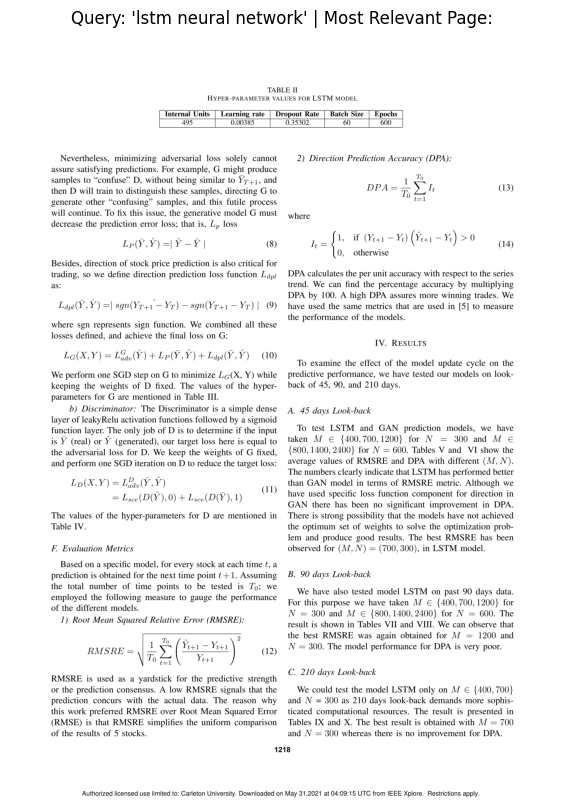

In [66]:
import fitz 

# open pdf and load target page
pdf_path = "maiti2020.pdf"
doc = fitz.open(pdf_path)
page = doc.load_page(3)

# get the image of the page
img = page.get_pixmap(dpi=300)

# optional: save the image
img.save("lstm_result.png")
doc.close()

# convert the pixmap to a numpy array
img_array = np.frombuffer(img.samples_mv, dtype=np.uint8).reshape((img.h, img.w, img.n))

# display the image using Matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most Relevant Page:")
plt.axis('off') # turn off axis
plt.show()

the workflow is the same 

`ingest documents -> split into chunks -> embed chunks -> make a query -> embed the query -> compare query embedding to chunk embeddings`

that is the `retrieval` part of retrieval augmented generation (rag).

### Similarity measure: dot product and cosine similarity

the main difference between dot product and cosine similarity is that, cosine similarity has a normalization step.

| similarity measure | description | code |
| :------------------|:------------|:----:|
| dot product | -measure of magnitude and direction between two vectors.<br>  -vectors that are aligned in direction and magnitude hav a higher positive value <br>-vectors that are opposite in direction and magnitude have a higher negative value. | torch.dot, np.dot, sentence_transformers.util.dot_score |
| cosine similarity | - vectors get normalized by magnitude/ euclidean norm /l2 norm so that they have unit length and are compared more so on direction. <br>-vectors that are aligned in direction have a value close to +1.<br> -vectors that are opposite in direction have a value close to -1. | torch.nn.functional.cosine_similarity, 1-scipy.spatial.distance.cosine (subtract the distance from 1 for similarity measure), sentence_transformers.util.cos_sim |

For text similarity, you generally want to use cosine similarity as we are after the semantic measurements (direction) rather than magnitude.

in our case, our embedding model all-mpnet-base-v2 outputs normalized outputs so dot product and cosine similarity return the same results, However, dot product is faster due to not need to perform a normalize step.

to make things bit more concrete, lets make a simple dot product and cosine similarity functions and view their results on different vectors.

In [67]:
import torch

def dot_product(vector1, vector2):
    return torch.dot(vector1, vector2)

def cosine_similarity(vector1, vector2):
    dot_product = torch.dot(vector1, vector2)

    # get euclidean/l2 norm of each vector (removes the magnitude, keeps direction)
    norm_vector1 = torch.sqrt(torch.sum(vector1**2))
    norm_vector2 = torch.sqrt(torch.sum(vector2**2))

    return dot_product / (norm_vector1 * norm_vector2)

# example tensors
vector1 = torch.tensor([1,2,3], dtype=torch.float32)
vector2 = torch.tensor([1,2,3], dtype=torch.float32)
vector3 = torch.tensor([4,5,6], dtype=torch.float32)
vector4 = torch.tensor([-1,-2,-3], dtype=torch.float32)

# calculate dot product
print("Dot product between vector1 and vector2:", dot_product(vector1, vector2))
print("Dot product between vector1 and vector3:", dot_product(vector1, vector3))
print("Dot product between vector1 and vector4:", dot_product(vector1, vector4))

# calculate cosine similarity
print("cosine similarity between vector1 and vector2:", cosine_similarity(vector1, vector2))
print("cosine similarity between vector1 and vector3:", cosine_similarity(vector1, vector3))
print("cosine similarity between vector1 and vector4:", cosine_similarity(vector1, vector4))

Dot product between vector1 and vector2: tensor(14.)
Dot product between vector1 and vector3: tensor(32.)
Dot product between vector1 and vector4: tensor(-14.)
cosine similarity between vector1 and vector2: tensor(1.0000)
cosine similarity between vector1 and vector3: tensor(0.9746)
cosine similarity between vector1 and vector4: tensor(-1.0000)


Notice for both dot product and cosine similarity the comparisons of `vector1` and `vector2` are opposite of `vector1` and `vector4`.

comparing `vector1` and `vector2` both equations turn positive values and for `vector1` and `vector4`, the result is in negative direction.

This makes sense because `vector4` is the negative version of `vector1`.

whereas, comparing `vector1` and `vector3` shows a different outcome.

For dot product, the value is positive and larger than the other two comparisons.

however, for cosine similarity, thanks to normalization step, comparing `vector1` and `vector3` results in a positive value close to 1 but not exactly 1.

It is because of this that when comparing text embeddings, cosine similarity is generally favoured as it measures the difference in directiion of a pair of vectors rather than the difference in magnitude.

And it is this difference in direction that is more generally considered to capture the semantic meaning/vibe of the text.

The good news is that, as mentioned before, the outputs of our embedding model `all-mpnet-base-v2` are already normalized.

So we can continue using the dot product (cosine similarity is dot product + normalization).

With similarity measures explained, let's functionize our semantic search steps from above so we can repeat them.

### Functionizing our semantic search pipeline

Lets put all of the steps from above for semantic search into a function or two so we can repeat the workflow.

In [68]:
def retrieve_relevant_resources(query: str, embeddings: torch.tensor, model: SentenceTransformer=embedding_model, n_resources_to_return: int=5, print_time: bool=True):

    # embed the query
    query_embedding = model.encode(query, convert_to_tensor=True)

    # get dot product scores on embeddings
    start_time = timer()
    dot_score = util.dot_score(query_embedding, embeddings)[0]
    end_time = timer()

    if print_time:
        print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

    scores, indices = torch.topk(input=dot_scores, k=n_resources_to_return)
    return scores, indices

def print_top_results_and_scores(query: str, embeddings: torch.tensor, pages_and_chunks: list[dict]=pages_and_chunks, n_resources_to_return: int=5):
    print(f"Query: {query}")
    print("Results:")
    scores, indices = retrieve_relevant_resources(query=query, embeddings=embeddings, n_resources_to_return=n_resources_to_return)

    for score, index in zip(scores, indices):
        print(f"Score: {score:.4f}")
        print_wrapped(pages_and_chunks[index]["sentence_chunk"])
        print(f"Page number: {pages_and_chunks[index]['page_number']}")
        print("\n")

In [69]:
query = "long short term memory"

# get just the scores and indices of top related results.

scores, indices = retrieve_relevant_resources(query=query, embeddings=embeddings)
scores, indices

[INFO] Time taken to get scores on 21 embeddings: 0.00020 seconds.


(tensor([0.5522, 0.5183, 0.5035, 0.5023, 0.4935], device='cuda:0'),
 tensor([15, 12,  4, 14, 11], device='cuda:0'))

In [70]:
print_top_results_and_scores(query=query, embeddings=embeddings)

Query: long short term memory
Results:
[INFO] Time taken to get scores on 21 embeddings: 0.00022 seconds.
Score: 0.5522
C. 210 days Look-back We could test the model LSTM only on M ∈{400, 700} and N =
300 as 210 days look-back demands more sophis- ticated computational resources.
The result is presented in Tables IX and X. The best result is obtained with M =
700 and N = 300 whereas there is no improvement for DPA.1218 Authorized licensed
use limited to: Carleton University. Downloaded on May 31,2021 at 04:09:15 UTC
from IEEE Xplore. Restrictions apply.
Page number: 3


Score: 0.5183
TABLE II HYPER-PARAMETER VALUES FOR LSTM MODEL Internal Units Learning rate
Dropout Rate Batch Size Epochs 495 0.00385 0.35302 60 600 Nevertheless,
minimizing adversarial loss solely cannot assure satisfying predictions. For
example, G might produce samples to “confuse” D, without being similar to ¯ YT
+1, and then D will train to distinguish these samples, directing G to generate
other “confusing” samples

### Semantic search/vector search extensions

for larger datasets, we should implement an index.<br>
index is for sorting embeddings before you search through them.<br>
so, it narrows down the search space.<br>
indexing libraries like `Faiss`<br>

### getting an llm for local generation 

#### checking local gpu memory availability

In [71]:
import torch 
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"Availability GPU memory: {gpu_memory_gb} GB")

Availability GPU memory: 4 GB


a gemma model will be used and following if else statements will help to determine which variant is most suitable for the local system

In [72]:
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb} GB, you may not have enough memory to run a Gemma LLM locally without quantization.")   

Your available GPU memory is 4 GB, you may not have enough memory to run a Gemma LLM locally without quantization.


In [73]:
%pip install bitsandbytes accelerate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available

# 1. create quantization config
# for models that require 4-bit quantization 
from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True, bnb_4bit_compute_dtype=torch.float16)

# set up flash attention 2 for faster inference, default to "sdpa" or "scaled dot producy attention"
# flash attention 2 requires nvidia gpu compute capability of 8.0 or above.
%pip install flash-attn

  Using cached flash_attn-2.6.3.tar.gz (2.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached einops-0.8.0-py3-none-any.whl.metadata (12 kB)
Using cached einops-0.8.0-py3-none-any.whl (43 kB)
  Running setup.py clean for flash-attn
Failed to build flash-attn
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [110 lines of output]
      fatal: not a git repository (or any of the parent directories): .git
      
      
      torch.__version__  = 2.4.0+cu118
      
      
      running bdist_wheel
      Guessing wheel URL:  https://github.com/Dao-AILab/flash-attention/releases/download/v2.6.3/flash_attn-2.6.3+cu118torch2.4cxx11abiFALSE-cp310-cp310-win_amd64.whl
      Precompiled wheel not found. Building from source...
      c:\Users\incha\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\cpp_extension.py:495: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
        warnings.warn(msg.format('we could not find ninja.'))
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-3.10
      creating build\lib.win-amd64-3.

In [75]:
if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0] >= 8):
  attn_implementation = "flash_attention_2"
else:
  attn_implementation = "sdpa"
print(f"[INFO] Using attention implementation: {attn_implementation}")

[INFO] Using attention implementation: sdpa


In [77]:
from transformers import AutoTokenizer, AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("EleutherAI/gpt-neo-1.3B",
                                             torch_dtype=torch.float16,
                                            quantization_config=quantization_config,
                                            low_cpu_mem_usage=True)
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-1.3B")


c:\Users\incha\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
